In [19]:
import json
import os
import matplotlib.pyplot as plt

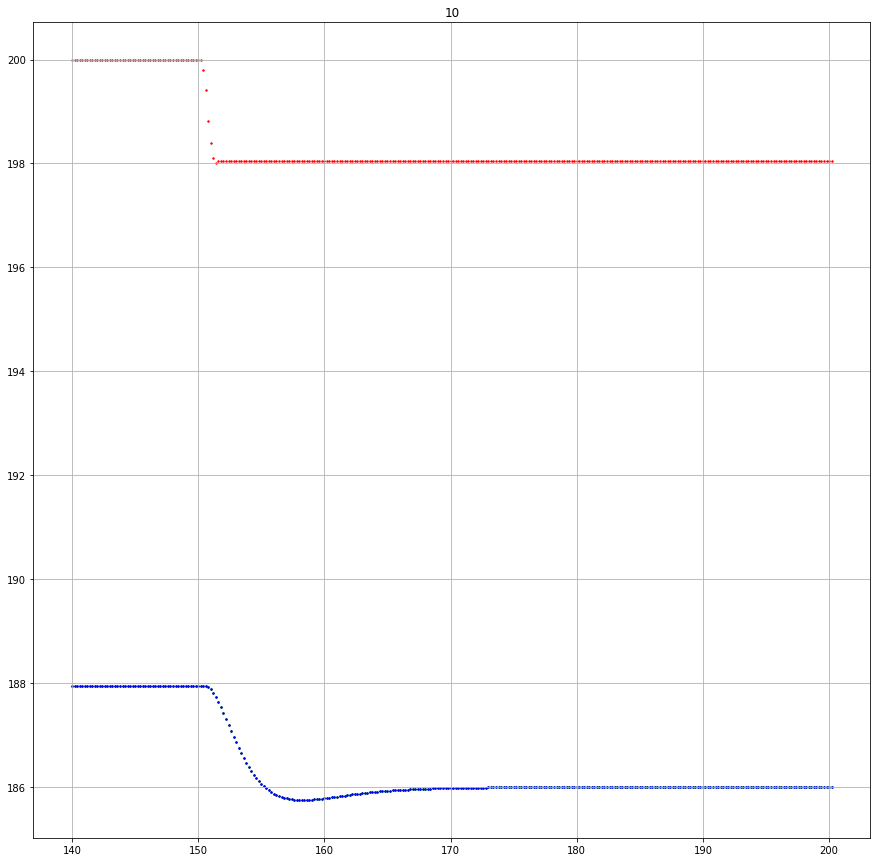

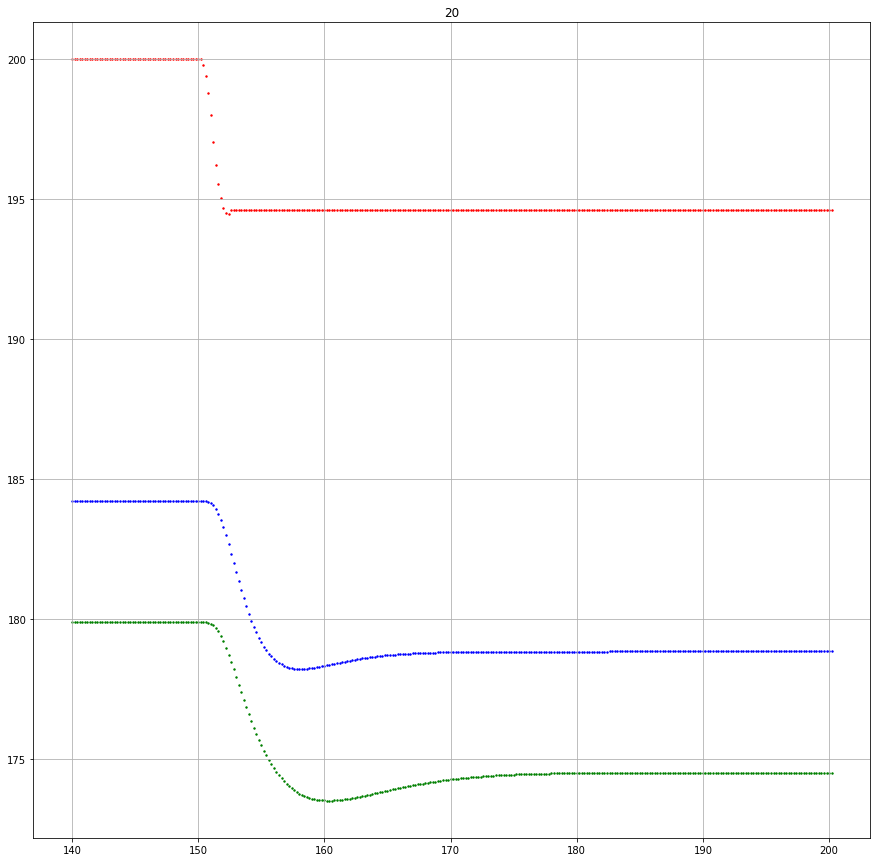

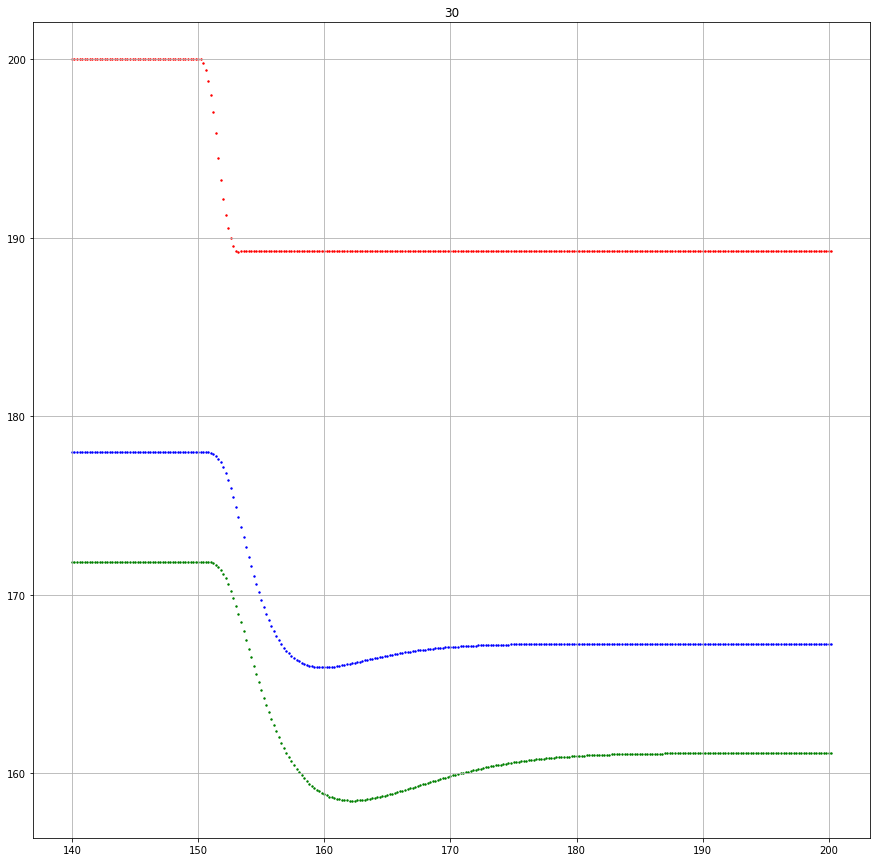

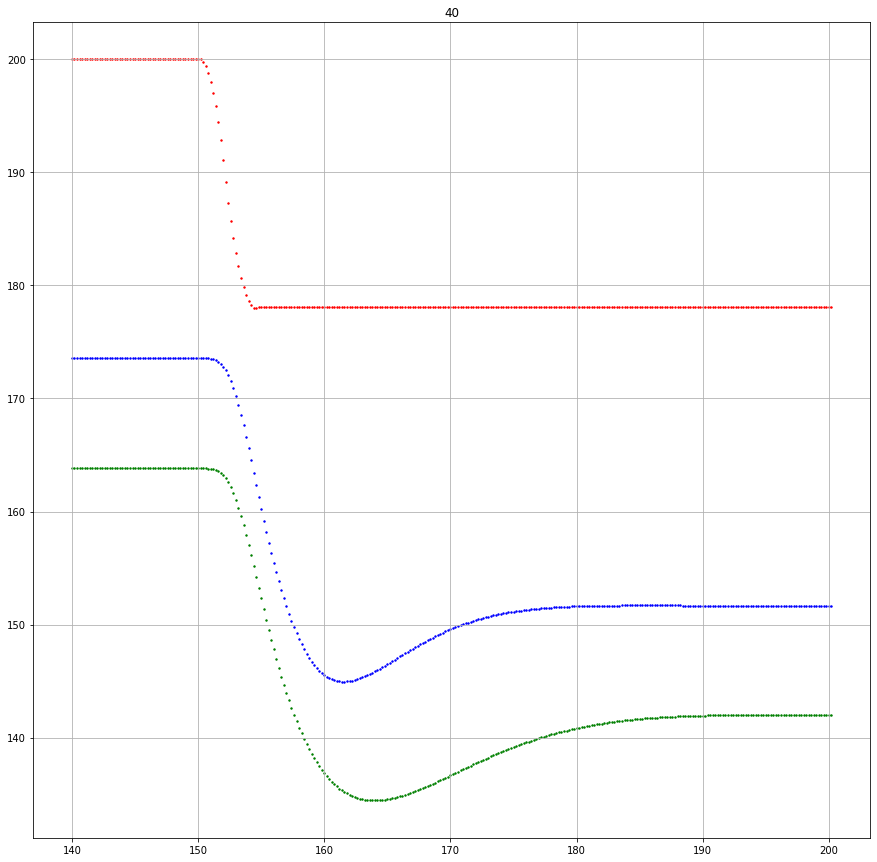

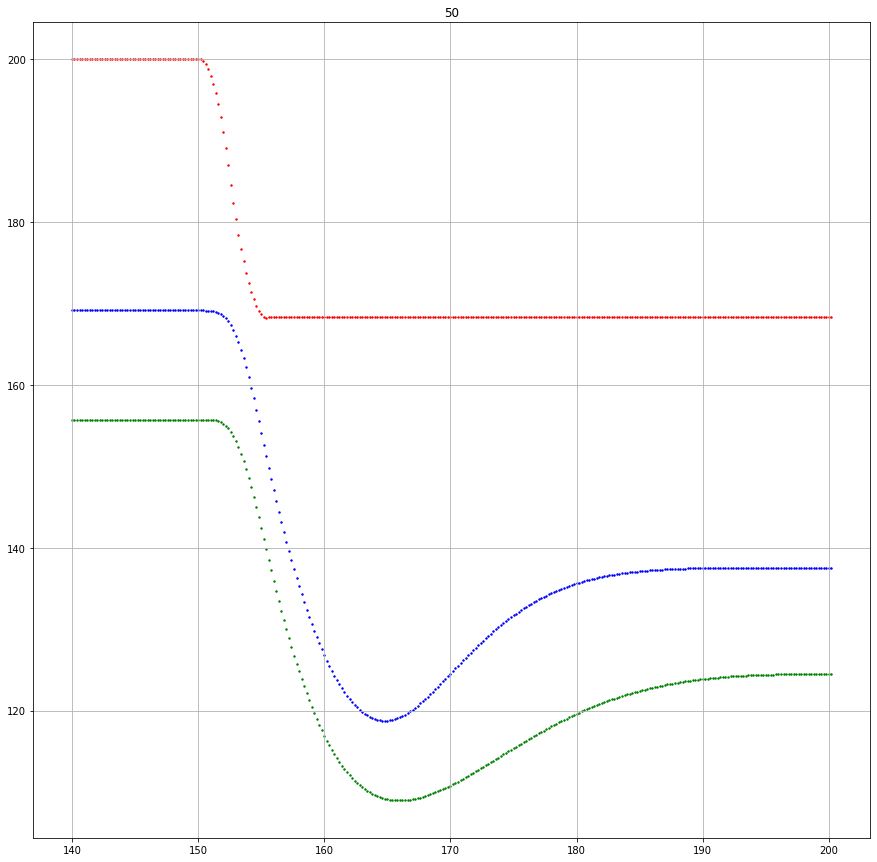

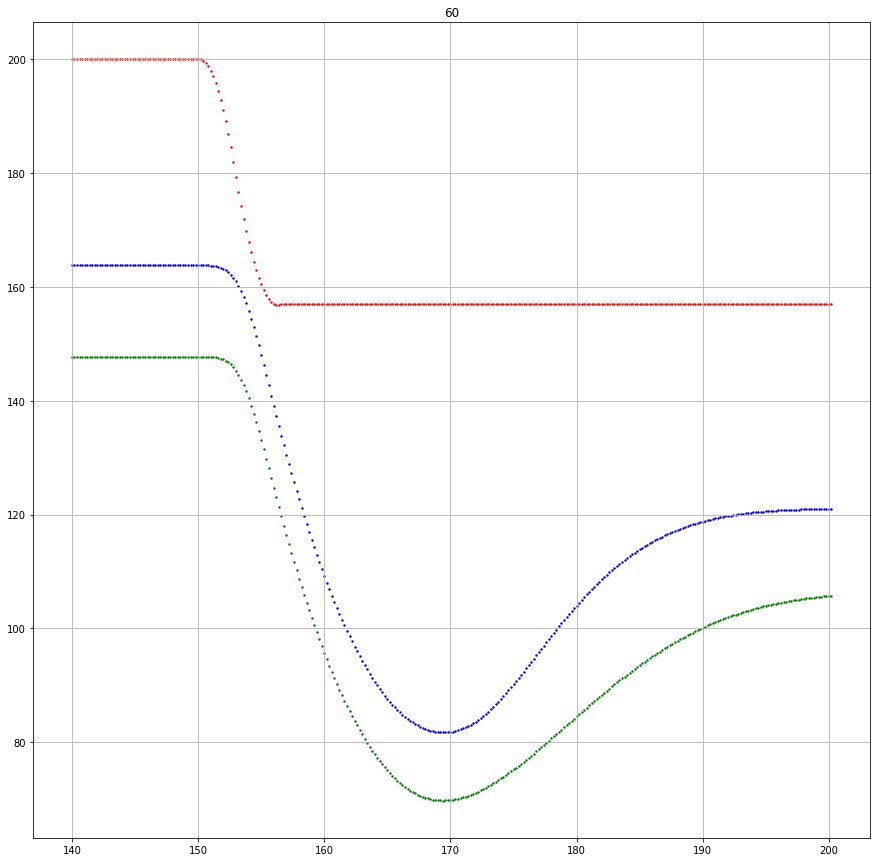

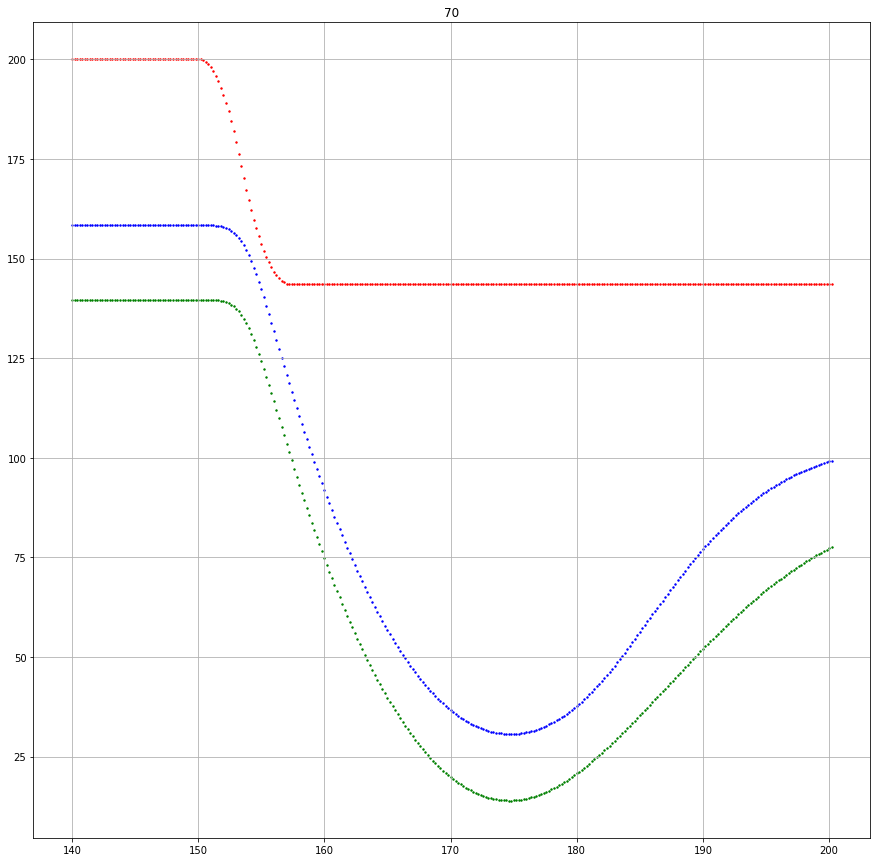

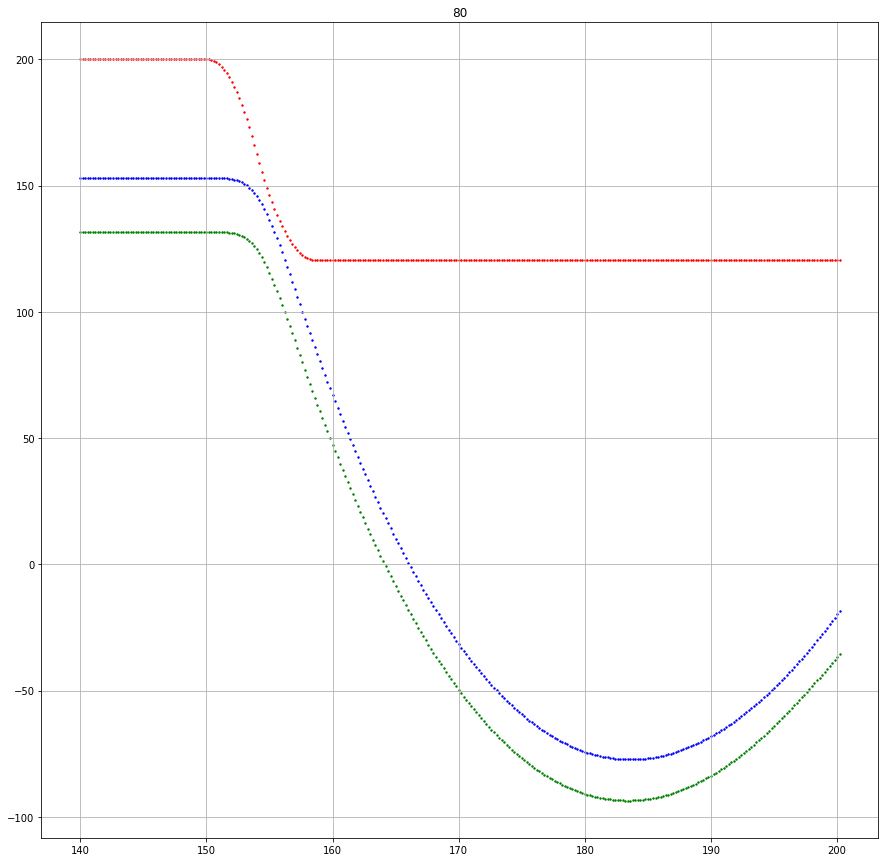

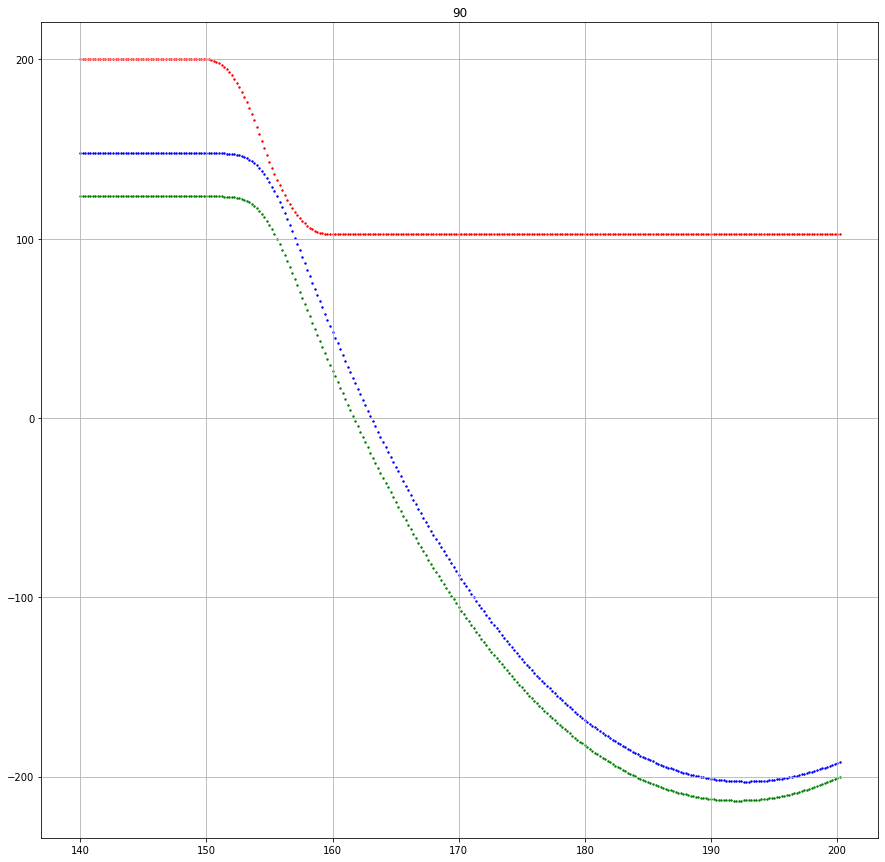

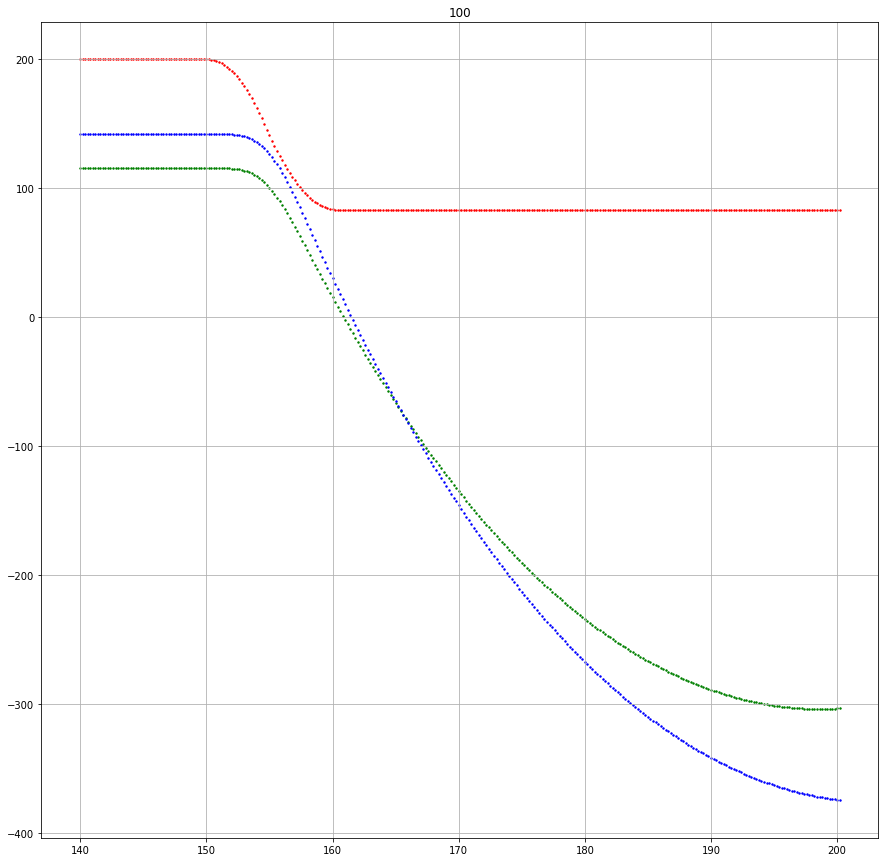

In [47]:
test_out_dir = R"C:\\Users\\ilia\\Documents\\openpilot\\test_out\\"

test_filenames = [path for path in os.listdir(test_out_dir) if 'None' in path]
test_filenames = sorted(test_filenames, key=lambda f: float(f.split('_')[0]))

for test_filename in test_filenames:
    xs = []
    ys_lead = []
    ys_vanilla = []
    ys_traffic = []
    
    speed = float(test_filename.split('_')[0])
    speed_mph = int(speed * 2.23694)

    with open(test_out_dir + test_filename.replace('None', '1.8')) as vanilla_f:
        vanilla_data = json.load(vanilla_f)

    with open(test_out_dir + test_filename) as traffic_f:
        traffic_data = json.load(traffic_f)

    for vanilla_point, traffic_point in zip(vanilla_data, traffic_data):
        if vanilla_point["t"] < 140:
            continue
        xs.append(vanilla_point["t"])
        linear_lead_pos = speed * vanilla_point["t"]
        ys_lead.append(vanilla_point["x_lead"] - linear_lead_pos)
        ys_vanilla.append(vanilla_point["x_ego"] - linear_lead_pos)
        ys_traffic.append(traffic_point["x_ego"] - linear_lead_pos)

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    ax.scatter(xs, ys_lead, c='r', s=2)
    ax.scatter(xs, ys_vanilla, c='g', s=2)
    ax.scatter(xs, ys_traffic, c='b', s=2)
    plt.title(speed_mph)
    plt.grid(True)
    plt.show()